# Implementation of Gradient-Boost Algorithm

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing neccesary packages
# Load libraries

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [3]:
boston_df=pd.read_csv('BostonHousing.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Data Preparation

In [5]:
#independent features
X=boston_df.iloc[:,:-1]
#dependent features
y=boston_df.iloc[:,-1]

#Data Definition
#CRIM: Per capita crime rate by town
#ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
#INDUS: Proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: Nitric oxide concentration (parts per 10 million)
#RM: Average number of rooms per dwelling
#AGE: Proportion of owner-occupied units built prior to 1940
#DIS: Weighted distances to five Boston employment centers
#RAD: Index of accessibility to radial highways

#TAX: Full-value property tax rate per $10,000

#PTRATIO: Pupil-teacher ratio by town
#B:  proportion of people of African American descent by town
#LSTAT: Percentage of lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

In [6]:
#Viewing Data - predictors
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
y[1:10] #response

1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: medv, dtype: float64

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

# Model training and evaluation

In [9]:
# Create gradientboost REGRESSOR object
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

#Important Parameters

#n_estimators: Number of weak learners to train iteratively.

#learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

In [10]:
# Train gradientboost REGRESSOR
model = gradientregressor.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [11]:
r2_score(y_pred,y_test)

0.7163091005546669

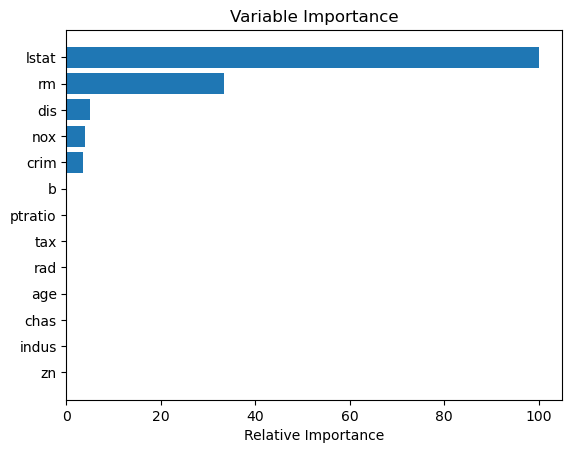

In [14]:
# Plot feature importance
feature_importance = model.feature_importances_

# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Plotting the horizontal bar chart
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston_df.columns[sorted_idx])  # Use 'columns' instead of 'feature_names'
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Lets tune the hyperparameters

In [15]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(), 
            param_grid = LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 100}, 0.8659042503604064)

# Similarly other hyperparameters like max_depth, split criteria, min no of leaf nodes etc can be tuned

# Pros:
 
It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. 

Gives better accuracy in most of the cases

# Cons:
Space and time complexity

Hyperparameter tuning